**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [31]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [32]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [33]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [34]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [35]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [41]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [42]:
# Initialize storage for expected and realized utilities
expected_utilities = np.zeros(par.J)
realized_utilities = np.zeros(par.J)

# Simulate and calculate the utilities
for j in range(par.J):
    # Simulate the error terms
    eps = np.random.normal(0, par.sigma, par.K)
    
    # Calculate the expected utility
    expected_utility = par.v[j] + np.mean(eps)
    expected_utilities[j] = expected_utility
    
    # Calculate the realized utility for each simulation and then take the average
    realized_utility = par.v[j] + eps
    average_realized_utility = np.mean(realized_utility)
    realized_utilities[j] = average_realized_utility

# Print the results: expected utility and the average realized utility for each career track.
for j in range(par.J):
    print(f'Career Track {j+1}:')
    print(f'  Expected Utility: {expected_utilities[j]:.4f}')
    print(f'  Average Realized Utility: {realized_utilities[j]:.4f}')

Career Track 1:
  Expected Utility: 0.9918
  Average Realized Utility: 0.9918
Career Track 2:
  Expected Utility: 1.9947
  Average Realized Utility: 1.9947
Career Track 3:
  Expected Utility: 3.0278
  Average Realized Utility: 3.0278


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

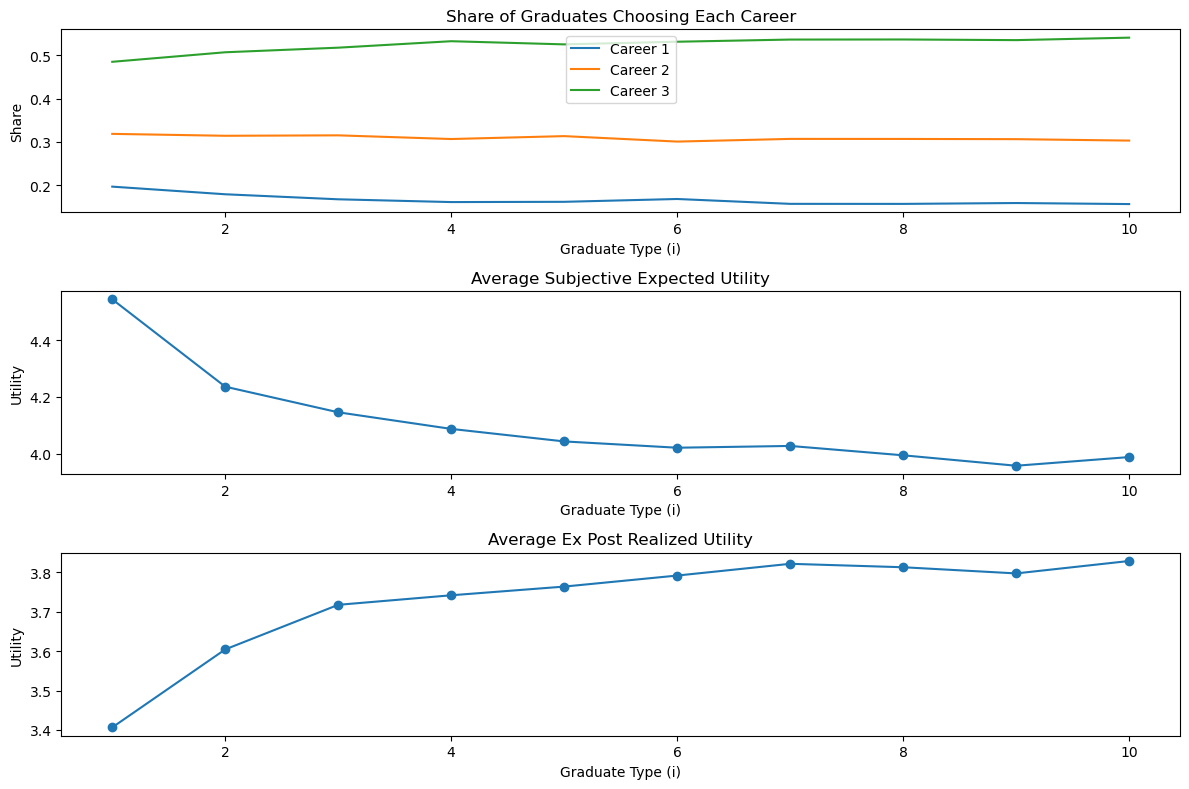

Share of graduates choosing each career for each type of graduate:
[[0.1968 0.3185 0.4847]
 [0.1792 0.3141 0.5067]
 [0.1676 0.3151 0.5173]
 [0.1612 0.3066 0.5322]
 [0.1618 0.3133 0.5249]
 [0.1683 0.3007 0.531 ]
 [0.1571 0.3069 0.536 ]
 [0.157  0.3068 0.5362]
 [0.159  0.3063 0.5347]
 [0.1566 0.303  0.5404]]

Average subjective expected utility for each type of graduate:
[4.54332782 4.23594097 4.14582029 4.08737382 4.04330515 4.02116811
 4.02741488 3.99448039 3.95777325 3.98823521]

Average ex post realized utility for each type of graduate:
[3.40633679 3.60432726 3.717477   3.7416854  3.76375232 3.79175273
 3.82156781 3.81285983 3.79718004 3.82872867]


In [43]:
# Initialize arrays to store results
share_of_graduates = np.zeros((N, J))
avg_subjective_expected_utility = np.zeros(N)
avg_realized_utility = np.zeros(N)

# New scenario with friends' influence
for i in range(1, N + 1):
    # Draw F_i = i friends' utilities for each career
    Fi = i
    prior_utilities = np.zeros((K, J))
    
    for j in range(J):
        epsilon_friends = np.random.normal(0, sigma, (K, Fi))
        prior_utilities[:, j] = v[j] + np.mean(epsilon_friends, axis=1)
    
    # Draw own noise terms
    epsilon_own = np.random.normal(0, sigma, (K, J))
    
    # Calculate prior expected utilities and choose the career with the highest utility
    expected_utilities_own = prior_utilities + epsilon_own
    chosen_careers = np.argmax(expected_utilities_own, axis=1)
    
    # Calculate shares of graduates choosing each career
    for j in range(J):
        share_of_graduates[i-1, j] = np.mean(chosen_careers == j)
    
    # Calculate the average subjective expected utility
    avg_subjective_expected_utility[i-1] = np.mean(expected_utilities_own[np.arange(K), chosen_careers])
    
    # Calculate the average realized utility
    realized_utilities = v[chosen_careers] + epsilon_own[np.arange(K), chosen_careers]
    avg_realized_utility[i-1] = np.mean(realized_utilities)

# Plot results
plt.figure(figsize=(12, 8))

# Plot share of graduates choosing each career
plt.subplot(3, 1, 1)
for j in range(J):
    plt.plot(range(1, N + 1), share_of_graduates[:, j], label=f'Career {j+1}')
plt.title('Share of Graduates Choosing Each Career')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Share')
plt.legend()

# Plot average subjective expected utility
plt.subplot(3, 1, 2)
plt.plot(range(1, N + 1), avg_subjective_expected_utility, marker='o')
plt.title('Average Subjective Expected Utility')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Utility')

# Plot average ex post realized utility
plt.subplot(3, 1, 3)
plt.plot(range(1, N + 1), avg_realized_utility, marker='o')
plt.title('Average Ex Post Realized Utility')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Utility')

plt.tight_layout()
plt.show()

# Print out the results for clarity
print("Share of graduates choosing each career for each type of graduate:")
print(share_of_graduates)
print("\nAverage subjective expected utility for each type of graduate:")
print(avg_subjective_expected_utility)
print("\nAverage ex post realized utility for each type of graduate:")
print(avg_realized_utility)  

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

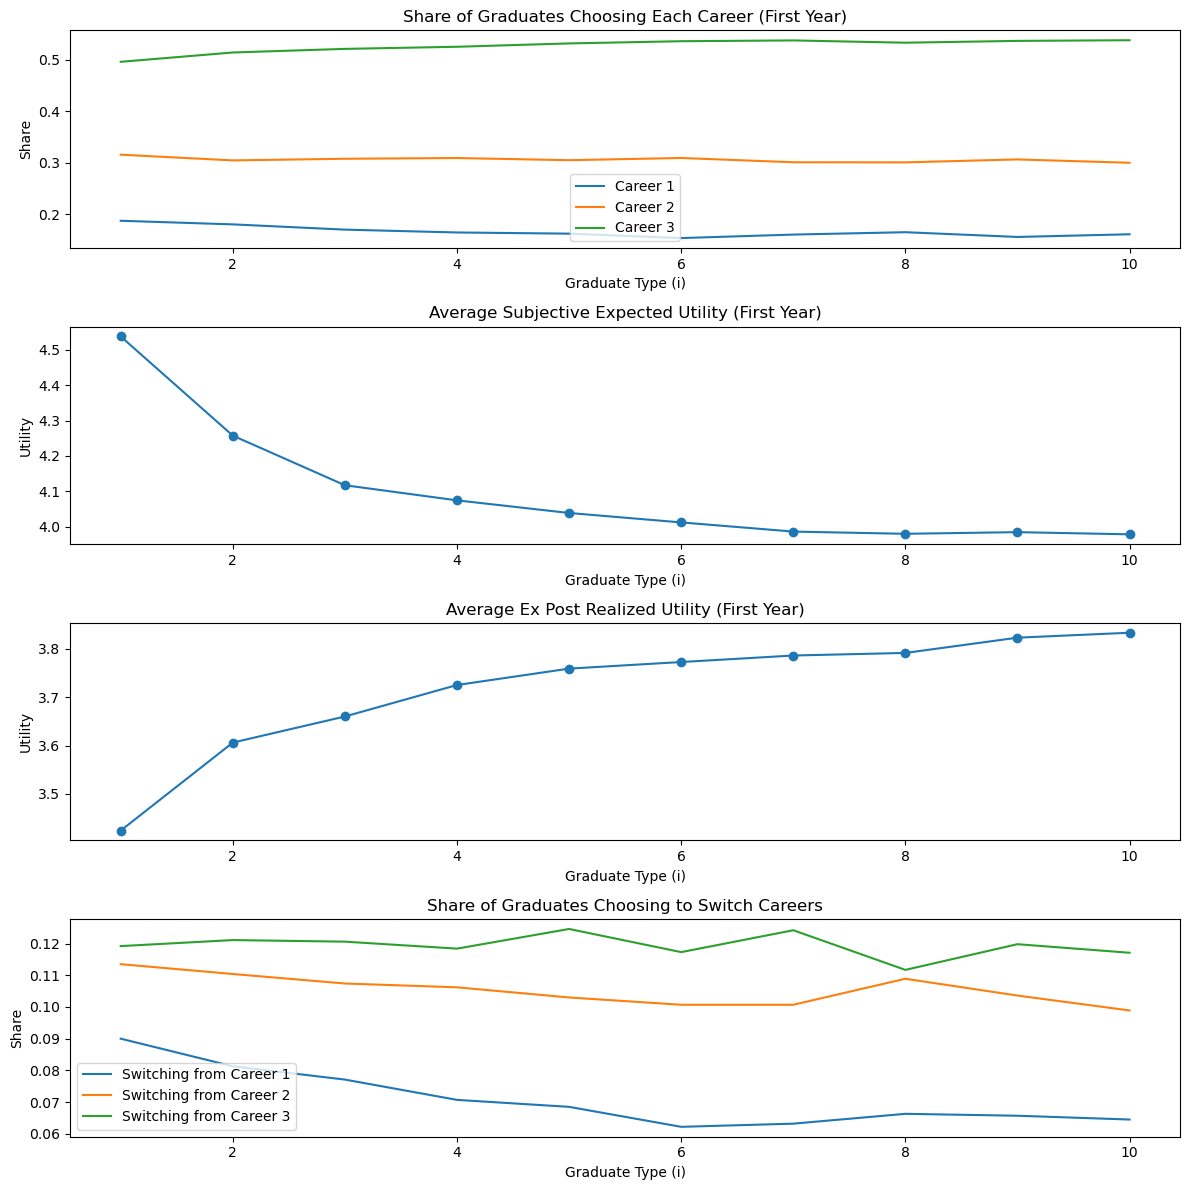

Share of graduates choosing each career in the first year for each type of graduate:
[[0.1877 0.316  0.4963]
 [0.1807 0.3049 0.5144]
 [0.1705 0.3081 0.5214]
 [0.165  0.3095 0.5255]
 [0.1627 0.3053 0.532 ]
 [0.1541 0.3096 0.5363]
 [0.1609 0.3013 0.5378]
 [0.1655 0.3011 0.5334]
 [0.1563 0.3068 0.5369]
 [0.1615 0.3003 0.5382]]

Average subjective expected utility in the first year for each type of graduate:
[4.5380932  4.25734075 4.1168704  4.0741024  4.03833376 4.0116182
 3.98565953 3.97936847 3.98406456 3.97789046]

Average ex post realized utility in the first year for each type of graduate:
[3.42423449 3.6063063  3.66030211 3.72543755 3.75936543 3.77299842
 3.78647143 3.79182658 3.82338817 3.83362738]

Share of graduates choosing to switch careers for each type of graduate:
[[0.09   0.1135 0.1192]
 [0.0813 0.1104 0.1211]
 [0.0771 0.1074 0.1206]
 [0.0707 0.1062 0.1184]
 [0.0685 0.103  0.1246]
 [0.0622 0.1007 0.1173]
 [0.0632 0.1007 0.1242]
 [0.0663 0.1089 0.1117]
 [0.0657 0.1036 0.1198

In [45]:
c = 1  # Switching cost

# Initialize arrays to store results
share_of_graduates_first_year = np.zeros((N, J))
share_of_graduates_switching = np.zeros((N, J))
avg_subjective_expected_utility_first_year = np.zeros(N)
avg_realized_utility_first_year = np.zeros(N)
avg_subjective_expected_utility_second_year = np.zeros(N)
avg_realized_utility_second_year = np.zeros(N)

# New scenario with friends' influence
for i in range(1, N + 1):
    # Draw F_i = i friends' utilities for each career
    Fi = i
    prior_utilities = np.zeros((K, J))
    
    for j in range(J):
        epsilon_friends = np.random.normal(0, sigma, (K, Fi))
        prior_utilities[:, j] = v[j] + np.mean(epsilon_friends, axis=1)
    
    # Draw own noise terms for first year
    epsilon_own_first_year = np.random.normal(0, sigma, (K, J))
    
    # Calculate prior expected utilities for the first year
    expected_utilities_first_year = prior_utilities + epsilon_own_first_year
    chosen_careers_first_year = np.argmax(expected_utilities_first_year, axis=1)
    
    # Calculate shares of graduates choosing each career in the first year
    for j in range(J):
        share_of_graduates_first_year[i-1, j] = np.mean(chosen_careers_first_year == j)
    
    # Calculate the average subjective expected utility in the first year
    avg_subjective_expected_utility_first_year[i-1] = np.mean(expected_utilities_first_year[np.arange(K), chosen_careers_first_year])
    
    # Calculate the average realized utility in the first year
    realized_utilities_first_year = v[chosen_careers_first_year] + epsilon_own_first_year[np.arange(K), chosen_careers_first_year]
    avg_realized_utility_first_year[i-1] = np.mean(realized_utilities_first_year)
    
    # Calculate new priors for the second year with the switching cost
    for k in range(K):
        for j in range(J):
            if j == chosen_careers_first_year[k]:
                prior_utilities[k, j] = realized_utilities_first_year[k]  # No cost for staying in the same career
            else:
                prior_utilities[k, j] -= c  # Include switching cost
    
    # Calculate new expected utilities for the second year
    epsilon_own_second_year = np.random.normal(0, sigma, (K, J))
    expected_utilities_second_year = prior_utilities + epsilon_own_second_year
    chosen_careers_second_year = np.argmax(expected_utilities_second_year, axis=1)
    
    # Calculate shares of graduates choosing to switch careers
    for j in range(J):
        switching_graduates = (chosen_careers_first_year == j) & (chosen_careers_second_year != j)
        share_of_graduates_switching[i-1, j] = np.mean(switching_graduates)
    
    # Calculate the average subjective expected utility in the second year
    avg_subjective_expected_utility_second_year[i-1] = np.mean(expected_utilities_second_year[np.arange(K), chosen_careers_second_year])
    
    # Calculate the average realized utility in the second year
    realized_utilities_second_year = np.zeros(K)
    for k in range(K):
        if chosen_careers_second_year[k] == chosen_careers_first_year[k]:
            realized_utilities_second_year[k] = realized_utilities_first_year[k]
        else:
            realized_utilities_second_year[k] = v[chosen_careers_second_year[k]] + epsilon_own_second_year[k, chosen_careers_second_year[k]] - c
    avg_realized_utility_second_year[i-1] = np.mean(realized_utilities_second_year)

# Plot results
plt.figure(figsize=(12, 12))

# Plot share of graduates choosing each career in the first year
plt.subplot(4, 1, 1)
for j in range(J):
    plt.plot(range(1, N + 1), share_of_graduates_first_year[:, j], label=f'Career {j+1}')
plt.title('Share of Graduates Choosing Each Career (First Year)')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Share')
plt.legend()

# Plot average subjective expected utility in the first year
plt.subplot(4, 1, 2)
plt.plot(range(1, N + 1), avg_subjective_expected_utility_first_year, marker='o')
plt.title('Average Subjective Expected Utility (First Year)')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Utility')

# Plot average ex post realized utility in the first year
plt.subplot(4, 1, 3)
plt.plot(range(1, N + 1), avg_realized_utility_first_year, marker='o')
plt.title('Average Ex Post Realized Utility (First Year)')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Utility')

# Plot share of graduates choosing to switch careers
plt.subplot(4, 1, 4)
for j in range(J):
    plt.plot(range(1, N + 1), share_of_graduates_switching[:, j], label=f'Switching from Career {j+1}')
plt.title('Share of Graduates Choosing to Switch Careers')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Share')
plt.legend()

plt.tight_layout()
plt.show()

# Print out the results for clarity
print("Share of graduates choosing each career in the first year for each type of graduate:")
print(share_of_graduates_first_year)
print("\nAverage subjective expected utility in the first year for each type of graduate:")
print(avg_subjective_expected_utility_first_year)
print("\nAverage ex post realized utility in the first year for each type of graduate:")
print(avg_realized_utility_first_year)
print("\nShare of graduates choosing to switch careers for each type of graduate:")
print(share_of_graduates_switching)
print("\nAverage subjective expected utility in the second year for each type of graduate:")
print(avg_subjective_expected_utility_second_year)
print("\nAverage ex post realized utility in the second year for each type of graduate:")
print(avg_realized_utility_second_year)

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [ ]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [ ]:
# write your answer here